# Part 1 - Data Collection and EDA

This notebook will focus on exploring data, analyzing an plotting insightful stats (class balance, image size distribution, etc.), loading data as 3-dimensional array, and preprocess data to prepare for modeling.

### Imports

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import os
from glob import glob
import cv2
import skimage
from skimage.transform import resize
from PIL import Image
import h5py

### Load the data

In [2]:
train_dir = './data/chest_xray/train/'
test_dir = './data/chest_xray/test/'
val_dir = './data/chest_xray/val/'

In [3]:
# Pneumonia images
p_images = glob(train_dir + '/PNEUMONIA/*.jpeg')

In [4]:
# Normal images
n_images = glob(train_dir + '/NORMAL/*.jpeg')

### EDA

Text(0.5, 1.0, 'Class Distribution')

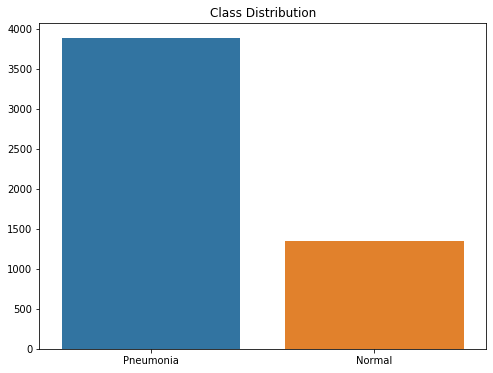

In [5]:
# Plot the class distribution
plt.figure(figsize=(8,6))
sns.barplot(['Pneumonia','Normal'],[len(p_images),len(n_images)])
plt.title('Class Distribution')

In [6]:
# Convert the first pneumonia image to array of pixels
np.asarray(plt.imread(p_images[0]))

array([[19, 19, 18, ...,  1,  0,  0],
       [19, 19, 18, ...,  1,  0,  0],
       [19, 19, 18, ...,  1,  0,  0],
       ...,
       [10, 10, 10, ..., 15, 15, 15],
       [10, 10, 10, ..., 15, 15, 15],
       [10, 10, 10, ..., 15, 15, 15]], dtype=uint8)

In [7]:
# Convert the first normal image to array of pixels
np.asarray(plt.imread(n_images[0]))

array([[ 22,  24,  24, ...,  96,  94,  93],
       [ 23,  24,  24, ...,  97,  94,  92],
       [ 24,  24,  23, ...,  99,  96,  94],
       ...,
       [ 49,  50,  48, ..., 119, 119, 119],
       [ 50,  52,  53, ..., 123, 124, 123],
       [ 52,  53,  54, ..., 129, 128, 127]], dtype=uint8)

In [8]:
# Check the shape of first pneumonia image array
np.asarray(plt.imread(p_images[0])).shape

(760, 1152)

In [9]:
# Check the shape of first normal image array
np.asarray(plt.imread(n_images[0])).shape

(1858, 2090)

In [10]:
img_class = []
height = []
weight = []

# Iterate through each image path
for d in os.listdir(train_dir):
        # find height and width of all train images
        for image in p_images:
                img_class.append(d)
                img_array = np.array(Image.open(image))
                height.append(img_array.shape[0])
                weight.append(img_array.shape[1])


# save image sizes to data frame
size_df = pd.DataFrame({
    'class': img_class,
    'height': height,
    'width': weight
})

Text(0.5, 1.0, 'Image Size Distribution')

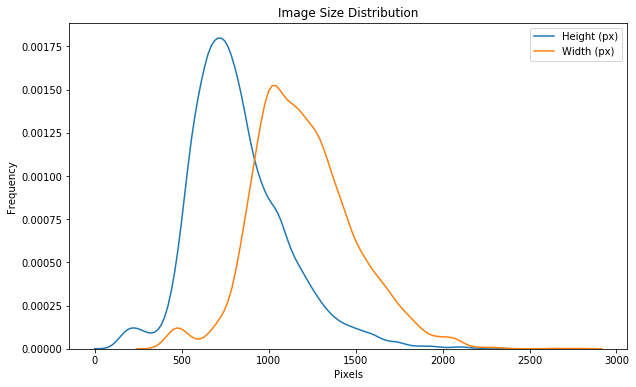

In [11]:
plt.figure(figsize = (10, 6))

sns.kdeplot(
    size_df['height'], label='Height (px)')
sns.kdeplot(
    size_df['width'], label='Width (px)')

plt.xlabel('Pixels')
plt.ylabel('Frequency')
plt.title('Image Size Distribution')

In [ ]:
# Plot first eight images
fig=plt.figure(figsize=(16, 8))
plt.title('Pneumonia Images', fontsize=18)
cols = 4
rows = 2
for i in range(1, cols*rows +1):
    img = np.asarray(plt.imread(p_images[i]))
    fig.add_subplot(rows, cols, i)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

In [ ]:
# Plot first eight images
fig=plt.figure(figsize=(16, 8))
plt.title('Healthy Images', fontsize=18)
cols = 4
rows = 2
for i in range(1, cols*rows +1):
    img = np.asarray(plt.imread(n_images[i]))
    fig.add_subplot(rows, cols, i)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

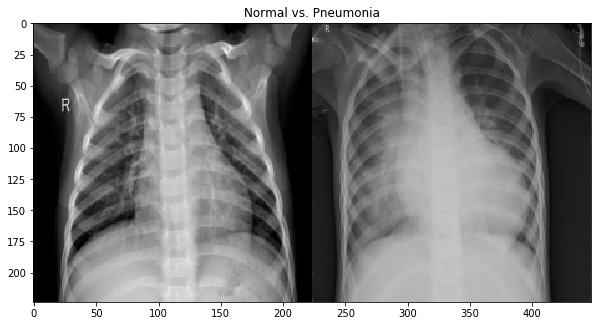

In [22]:
def pair_plot(index):
    n_image = skimage.transform.resize(cv2.imread(n_images[index]), (224, 224, 3))
    p_image = skimage.transform.resize(cv2.imread(p_images[index]), (224, 224, 3))
    pair = np.concatenate((n_image, p_image), axis=1)
    plt.figure(figsize=(10,8))
    plt.title("Normal vs. Pneumonia")    
    plt.imshow(pair)
    plt.show()
    
pair_plot(4)

### Data Preprocessing

In [ ]:
train_images = glob(train_dir + '/NORMAL/*.jpeg') + glob(train_dir + '/PNEUMONIA/*.jpeg')

In [ ]:
test_images = glob(test_dir + '/NORMAL/*.jpeg') + glob(test_dir + '/PNEUMONIA/*.jpeg')

In [ ]:
print(os.listdir(train_dir))

In [ ]:
def load_data(dir_path):
    X = []
    y = []
    
    for dir_name in os.listdir(dir_path):
        if dir_name == 'NORMAL':
            label = 0
        elif dir_name == 'PNEUMONIA':
            label = 1
#         print(dir_name)
     
        image_paths = glob(dir_path + '/' + dir_name + '/*.jpeg')
        for image_file in image_paths:
#             print(f'image file: {image_file}')
            image = np.asarray(skimage.transform.resize(cv2.imread(image_file), (256, 256, 3)))
            X.append(image)
            y.append(label)
                    
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

In [ ]:
X_train, y_train = load_data(train_dir)

In [ ]:
X_test, y_test = load_data(test_dir)

In [ ]:
# Print size of train images and label arrays
print(f'Train size: {X_train.shape} \n {y_train.shape}')

In [ ]:
# Print size of test images and label arrays
print(f'Test size: {X_test.shape} \n {y_test.shape}')

In [ ]:
# Sanity check of first image array
X_train[0]

In [ ]:
y_train[0]

In [ ]:
# # Save train images as 3-dimensional array for further use in model
# with h5py.File('train_dataset.h5', 'w') as hf:
#     hf.create_dataset("train_images",  data=X_train)

In [ ]:
# # Save test images as 3-dimensional array for further use in model
# with h5py.File('test_dataset.h5', 'w') as hf:
#     hf.create_dataset("test_images",  data=X_test)